<a href="https://colab.research.google.com/github/aniruddhadotconnect/Data-Science--Cheat-Sheet/blob/master/TEST_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(-10,10,40)
a = np.linspace(-1,1,0.2)
for val in a:
    y = x**a
    plt.plot(x,y)
    plt.show()
    

([0.0,
  0.5,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5],
 [1.0,
  0.7788007830714049,
  0.36787944117144467,
  0.10539922456259311,
  0.018315639027613618,
  0.0019304701885082612,
  0.00012453515583387215,
  5.2636291313419095e-05,
  0.0012342105760415147,
  0.019304542967505146,
  0.18315638890122973,
  1.053992245618716,
  3.678794411714424,
  7.788007830714049,
  10.0,
  7.788007830714049,
  3.6787944117144233,
  1.0539922456186432,
  0.1831563888873418,
  0.01930454136227709])

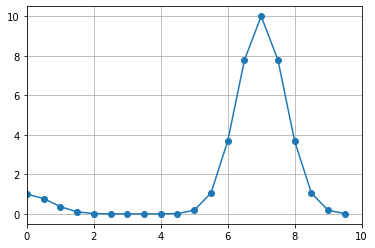

In [4]:
import matplotlib.pyplot as plt
plt.ion()
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o-')
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        ...

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    #Example
    def __call__(self):
        import numpy as np
        import time
        self.on_launch()
        xdata = []
        ydata = []
        for x in np.arange(0,10,0.5):
            xdata.append(x)
            ydata.append(np.exp(-x**2)+10*np.exp(-(x-7)**2))
            self.on_running(xdata, ydata)
            time.sleep(1)
        return xdata, ydata

d = DynamicUpdate()
d()